# Data Visualization

Our project is predominantly based on data mining of the real estate portal (Sreality) in the Czech Republic. The majority of the data gathered is going to be used in passion project of ours. However, the brief visualization can be found in this part of the project. The visualization is going to be divided in two parts - first, description of the width of real estate marktet and second, description of prices.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#set path to scrapped data
pathData = "data_sreality.csv"

In [4]:
data = pd.read_csv(pathData)

In [5]:
data.head(1)

,index,aukce,cena_aukce,lokalita,cena,cena_czk_value,cena_czk_unit,cena_czk_name,lat,lon,...,price_whole,price_recalculated,price_recalculated_perunit,typ_inzeratu,kategorie,podkategorie,s_userid,s_mobile,s_active,s_name
0,1000096092,False,0.0,"ulice Tyršova, Děčín - část obce Děčín I-Děčín",1,1,NaN,Celková cena,50.780903,14.209308,...,NaN,NaN,NaN,prodej,komercni,obchodni prostory,82274.0,602974442.0,True,RE/MAX Eso


In [6]:
# We are going to see what data looks like
data.describe()

,index,cena_aukce,cena,cena_czk_value,lat,lon,hash,price_whole,price_recalculated,s_userid,s_mobile
count,5.976900e+04,5.976900e+04,5.976900e+04,5.976900e+04,59769.000000,59769.000000,5.976900e+04,5.408800e+04,1.845400e+04,59009.000000,5.899900e+04
mean,2.151101e+09,1.119390e+04,2.950667e+06,2.950667e+06,49.866166,15.343500,2.151101e+09,8.812985e+06,9.510605e+03,55635.180227,6.740549e+08
std,1.242095e+09,4.115669e+05,2.067613e+07,2.067613e+07,0.467330,1.555420,1.242095e+09,1.249993e+09,3.387385e+05,30932.923970,1.566348e+08
min,3.644400e+04,0.000000e+00,1.000000e+00,1.000000e+00,48.615200,12.163219,3.644400e+04,1.000000e+00,1.000000e+00,266.000000,1.702400e+04
25%,1.076727e+09,0.000000e+00,1.700000e+04,1.700000e+04,49.576118,14.371387,1.076727e+09,3.740000e+04,1.470000e+02,21098.000000,6.043418e+08
50%,2.152374e+09,0.000000e+00,1.070000e+06,1.070000e+06,49.997047,14.620621,2.152374e+09,1.485000e+06,3.854750e+02,66570.000000,7.329097e+08
75%,3.230421e+09,0.000000e+00,3.630000e+06,3.630000e+06,50.110455,16.610714,3.230421e+09,3.960000e+06,1.563750e+03,83705.000000,7.772247e+08
max,4.294819e+09,4.860400e+07,3.317330e+09,3.317330e+09,51.025295,18.833136,4.294819e+09,2.903713e+11,3.001533e+07,92777.000000,9.727419e+08


In [7]:
# let's see columns:
data.columns

Index(['index', 'aukce', 'cena_aukce', 'lokalita', 'cena', 'cena_czk_value',
       'cena_czk_unit', 'cena_czk_name', 'lat', 'lon', 'hash', 'urlSreality',
       'linkdetail', 'download_date', 'description', 'locality_typ',
       'locality_value', 'text', 'price_whole', 'price_recalculated',
       'price_recalculated_perunit', 'typ_inzeratu', 'kategorie',
       'podkategorie', 's_userid', 's_mobile', 's_active', 's_name'],
      dtype='object')

In [8]:
# we explored ambigious variables:
data.count()

index                         59769
aukce                         59769
cena_aukce                    59769
lokalita                      59769
cena                          59769
cena_czk_value                59769
cena_czk_unit                 18759
cena_czk_name                 59769
lat                           59769
lon                           59769
hash                          59769
urlSreality                   59769
linkdetail                    59769
download_date                 59769
description                   59611
locality_typ                  59611
locality_value                59611
text                          59611
price_whole                   54088
price_recalculated            18454
price_recalculated_perunit    18454
typ_inzeratu                  59611
kategorie                     59611
podkategorie                  59611
s_userid                      59009
s_mobile                      58999
s_active                      59009
s_name                      

In [9]:
data.groupby("cena_czk_name").size() #ok

cena_czk_name
Celková cena    59769
dtype: int64

In [10]:
data.groupby("cena_czk_unit").size() # 18759 "za měsíc" or NaN

cena_czk_unit
za měsíc    18759
dtype: int64

In [11]:
# We drop na for data where cathegory is missing, since this is a core variable for visualisation and it is only ~0.2% of data.
data_clean = data.dropna(subset=['kategorie', 'podkategorie'])

In [12]:
# Let's see cathegories for future visualization
data_clean.groupby("podkategorie").size()

podkategorie
1+1                     1507
1+kk                    2559
2+1                     3704
2+kk                    5201
3+1                     3994
3+kk                    3596
4+1                      807
4+kk                    1236
5+1                      133
5+kk                     219
6 a vice                  89
atypicky                 108
bydleni                 5233
chalupa                  683
chata                   1409
cinzovni dum             493
garaz                    446
garazove stani           216
kancelare               4282
komercni                 658
lesy                     376
louky                    363
mobilheim                  7
na klic                  319
obchodni prostory       3038
ostatni                 1397
pamatka/jine              66
pole                    1076
pudni prostor              8
restaurace               650
rodinny                10787
rybniky                   20
sady/vinice               31
sklady                  2016
u

## 1) Visualition - description of the Czech Real Estate market (proxied by Sreality)

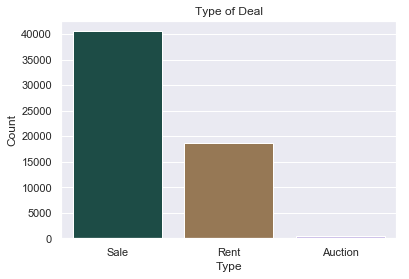

In [13]:
sns.set(style="darkgrid")

ax = sns.countplot(x="typ_inzeratu",palette="cubehelix", data=data_clean)

q=ax.set_title("Type of Deal")
q=ax.set(xticklabels=["Sale", "Rent", "Auction"])
q=ax.set(xlabel='Type', ylabel='Count')


From the chart, we can see that the most listing are in form of sale. Afterwards, rent deals which is only approximately half of the sale deals. Furthermore, auction deals are only small negliable fraction of the Sreality web.

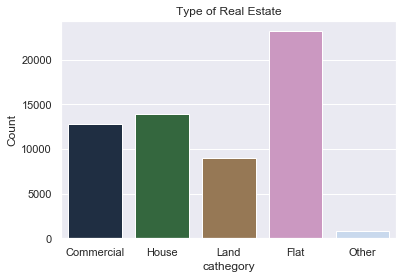

In [14]:
sns.set(style="darkgrid")
ax = sns.countplot(x="kategorie",palette="cubehelix", data=data_clean)

ax.set_title("Type of Real Estate")
q=ax.set(xticklabels=["Commercial", "House", "Land", "Flat", "Other"])
q=ax.set(xlabel='cathegory', ylabel='Count')

From the type of Real Estate side, we can clearly see, that cathegory flats is the largest. The second largest on Sreality web are Houses. It is interesting, that after flats, even the house, commercial RE and land are very large cathegories. Let's look at the distribution of renting and selling of these Real Estate types, to get additional information about the market.

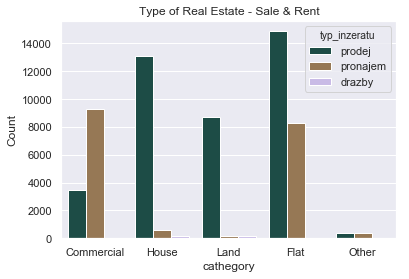

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(x="kategorie",palette="cubehelix", data=data_clean, hue="typ_inzeratu")

q=ax.set_title("Type of Real Estate - Sale & Rent")
q=ax.set(xticklabels=["Commercial", "House", "Land", "Flat", "Other"])
q=ax.set(xlabel='cathegory', ylabel='Count')

From the more detailed chart, we can see that commercial RE is mostly listed as a rental - which is common business practice (for example for offices). On the other hand, lands and houses are rarely rented, mostly only for sale. This confirms economical rationality of the market as these two cathegories can be rarely economically justified in case of renting. 

Moreover, we can see that majority of offered flats are for sale, which is interesting fact - we expected the ratios to be inverse, as the rents are rapidly increasing, however the prices increased as well and sellers may want to utilize a good economical conditions to sell their flats. Maybe, because the sellers are thinking that the economy is at its peek and the prices will go down. It would be interesting to see the ratio of sale/rent for flats (as flats are commonly being sold as well as rented) in the time-series data. It could be a good indicator of the market mood.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


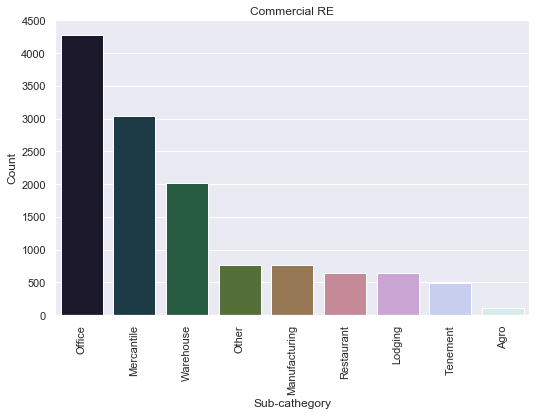

In [16]:
data_tmp = data_clean[data_clean.kategorie=="komercni"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index
                  )

q=plt.title('Commercial RE')
q=g.set(xticklabels=["Office", "Mercantile", "Warehouse", "Other","Manufacturing","Restaurant","Lodging","Tenement","Agro"])
q=g.set(xlabel='Sub-cathegory', ylabel='Count')
q=g.set_xticklabels(rotation=90)

From the commercial Real Estate, the most offered sub-cathegory are Office and Mercantile.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


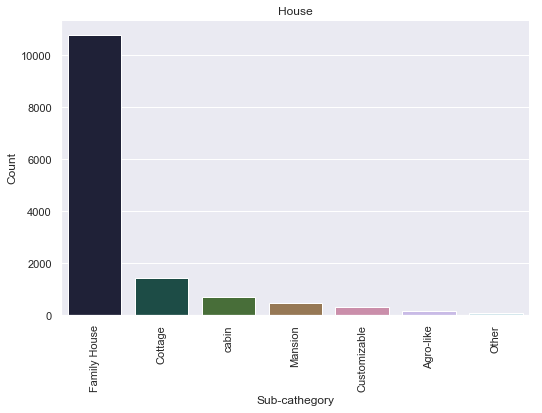

In [17]:
data_tmp = data_clean[data_clean.kategorie=="domy"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index
                  )
q=plt.title('House')
q=g.set(xticklabels=["Family House", "Cottage", "cabin", "Mansion","Customizable","Agro-like","Other"])
q=g.set(xlabel='Sub-cathegory', ylabel='Count')
q=g.set_xticklabels(rotation=90)

From Cathegory House - the classical houses ("family house") are the biggest sub-cathegory.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


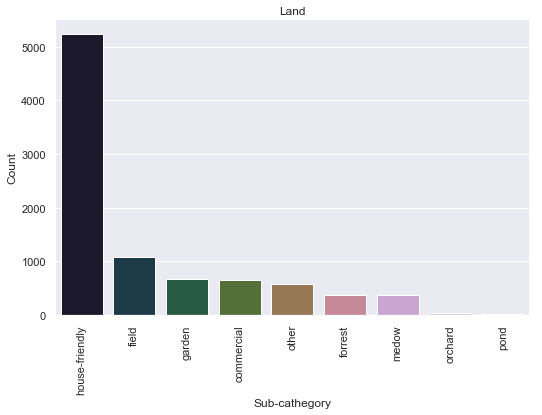

In [18]:
data_tmp = data_clean[data_clean.kategorie=="pozemky"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index
                  )
q=plt.title('Land')
q=g.set(xticklabels=["house-friendly", "field", "garden", "commercial","other","forrest","medow","orchard","pond"])
q=g.set(xlabel='Sub-cathegory', ylabel='Count')
q=g.set_xticklabels(rotation=90)

Classical land offered for house building is the main sub-cathegory.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


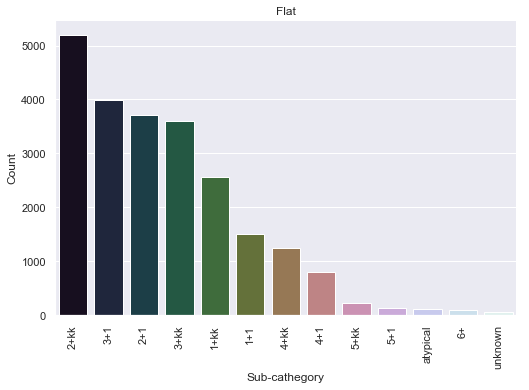

In [19]:
data_tmp = data_clean[data_clean.kategorie=="byty"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index
                  )
q=plt.title('Flat')
q=g.set(xticklabels=["2+kk", "3+1", "2+1", "3+kk","1+kk","1+1","4+kk","4+1","5+kk","5+1","atypical","6+","unknown"])
q=g.set(xlabel='Sub-cathegory', ylabel='Count')
q=g.set_xticklabels(rotation=90)

This sub-cathegory is the most interesting. We can see that the supply of flats is strongest for 2 or 3 rommed flats and than for flats with 1 room. (kk = kitchenette)

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


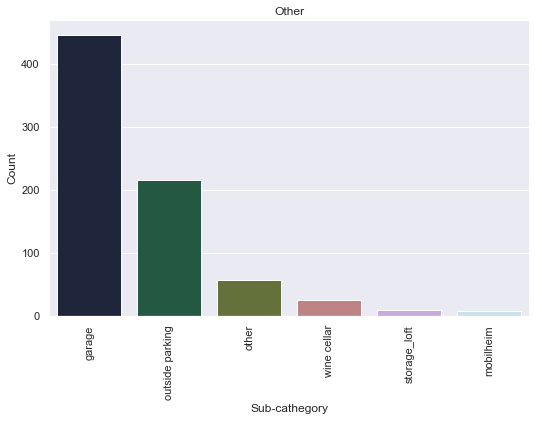

In [20]:
data_tmp = data_clean[data_clean.kategorie=="ostatni"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index
                  )

q=plt.title('Other')
q=g.set(xticklabels=["garage", "outside parking", "other", "wine cellar","storage_loft","mobilheim"])
q=g.set(xlabel='Sub-cathegory', ylabel='Count')
q=g.set_xticklabels(rotation=90)

Parking spaces are dominating the Other cathegory. 

(Morover, we were suprised that we can choose from a solid variety of wine cellars in case of midlife crisis.)

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


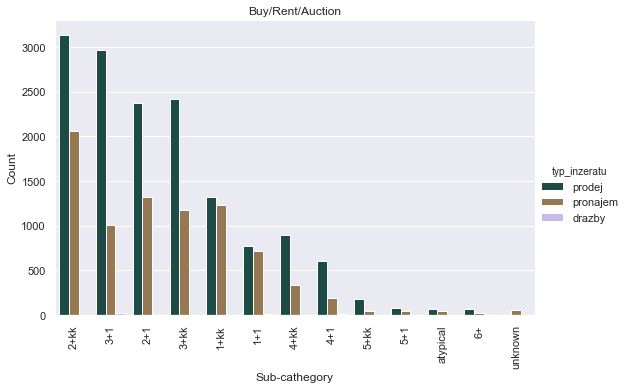

In [21]:
data_tmp = data_clean[data_clean.kategorie=="byty"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index, 

                   hue="typ_inzeratu")
q=plt.title('Buy/Rent/Auction')
q=g.set(xticklabels=["2+kk", "3+1", "2+1", "3+kk","1+kk","1+1","4+kk","4+1","5+kk","5+1","atypical","6+","unknown"])
q=g.set(xlabel='Sub-cathegory', ylabel='Count')
q=g.set_xticklabels(rotation=90)

We can see that best offer is for 2+kk, it may imply higher demand for 2+kk. Also small 1+1 and 1+kk are relatively largely utilized as rentals. Generally,the smaller the flat the higher the ratio of renting offers to all offers.

In [22]:
#Some prices are weird (i.e. 1CZK). We believe its price that is going to be negotiated later.
data_clean["flag_1CZK"] = data_clean.cena == 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
#number of 1CZK listing => negotiable listings
sum(data_clean.flag_1CZK == 1)

5524

In [24]:
#number of 1czk by sale and rent
data_clean[["typ_inzeratu", "flag_1CZK", "cena"]].groupby([ "typ_inzeratu", "flag_1CZK"]).count()

cena
typ_inzeratu flag_1CZK       
drazby       False        374
prodej       False      36908
             True        3635
pronajem     False      16805
             True        1889

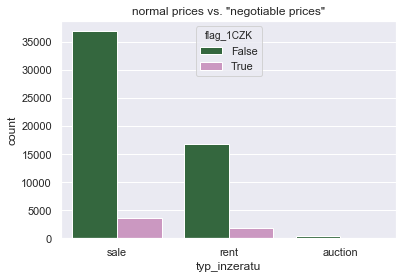

In [25]:
sns.set(style="darkgrid")
ax = sns.countplot(x="typ_inzeratu",palette="cubehelix", data=data_clean, hue="flag_1CZK")
q=plt.title('normal prices vs. "negotiable prices"')
q=ax.set(xticklabels=["sale", "rent", "auction"])
q=g.set(xlabel='Type', ylabel='Count')

Relatively small percantage of deals are negotiable.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


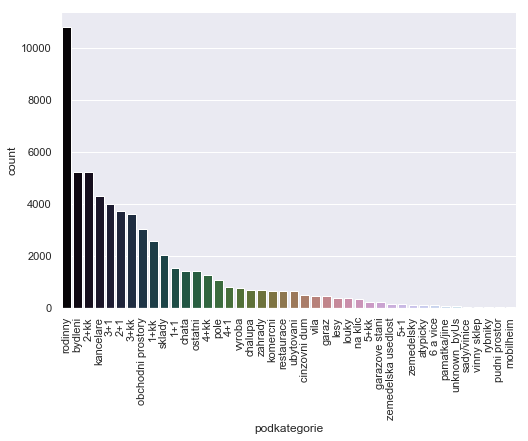

In [26]:
# frequent real estate agency
g = sns.factorplot("podkategorie",palette="cubehelix", data=data_clean, 
                   aspect=1.5, kind="count", color="b",
                  order = data_clean['podkategorie'].value_counts().index)
g.set_xticklabels(rotation=90)

Big picture of Sub-cathegory - as seen on the charts before.

In [27]:
#frequent real estate agency
#select top 20 agencies
d_temp = data_clean.groupby("s_name").count()

In [28]:
d = d_temp["index"].sort_values(ascending=False)[0:20]

In [29]:
dd = pd.DataFrame(d)
proc = pd.DataFrame(d/data_clean.s_name.count()*100)

In [30]:
#top real estate agencies
dd.head()

,index
s_name,
M&M reality,6622
Bidli,1208
"Realitní kancelář STING, s.r.o.",897
NEXT REALITY,706
OK Realitní služby,680


In [31]:
# head of percentages
proc.head()

,index
s_name,
M&M reality,11.222017
Bidli,2.047145
"Realitní kancelář STING, s.r.o.",1.520107
NEXT REALITY,1.196428
OK Realitní služby,1.152367


In [32]:
data_clean_sub = data_clean[data_clean.s_name.isin(dd.index)]

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


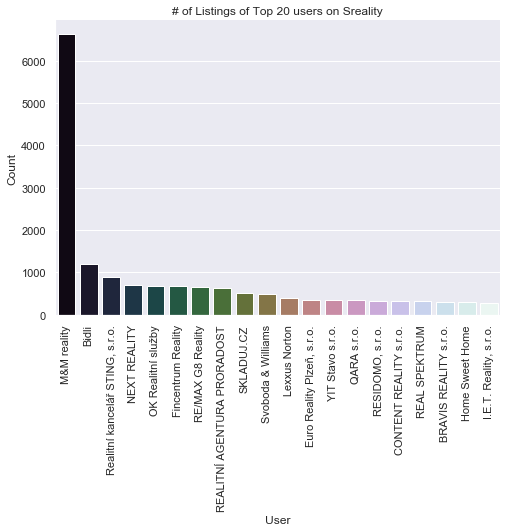

In [33]:
# frequent real estate agency
g = sns.factorplot("s_name",palette="cubehelix", data=data_clean_sub, 
                   aspect=1.5, kind="count", color="b",
                  order = data_clean_sub['s_name'].value_counts().index)

q=plt.title('# of Listings of Top 20 users on Sreality')

q=g.set(xlabel='User', ylabel='Count')
g.set_xticklabels(rotation=90)

M&M reality is the biggest listing entity on the Sreality web, which is not suprising since M&M reality is the biggest real estate agency in the Czech Republic. However the gap between the M&M and rest is suprisingly big - the M&M has more than 6,600 listings (11.2% share), the second bigest agency has only 1,200 with 2% market share. In next section, we will look at the price point offered by these RE agencies.

## 2) Visualition - prices in the Czech Real Estate market (proxied by Sreality)

First of all, we are going to clean data (for price visualization). Such a Auction cathegory - since it small and provide mixed information.

In [34]:
data_clean[["typ_inzeratu","aukce"]].groupby("aukce").count()

,typ_inzeratu
aukce,
False,59237
True,374


In [35]:
#drop auction due to their unrealistic values.
noaukce = data_clean[data.aukce == 0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Drop weird prices (i.e. price 1czk and also drop extremely large values (they imply misleading histograms...) we will use data up to 99 percentile of price.

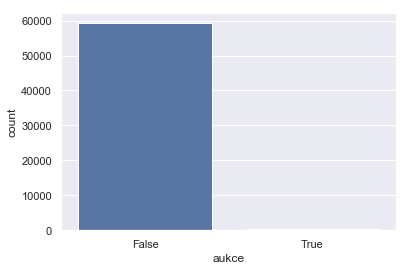

In [36]:
sns.set(style="darkgrid")
ax = sns.countplot(x="aukce", data=data_clean)

Overall, we are going to select non-auction data and price that is not "negotiable (i.e. 1czk)" and use only 99 percentile.

In [37]:
noaukce_data_tmp = noaukce[noaukce.cena < np.percentile(noaukce.cena, 99)]

noaukce_data_clean = noaukce_data_tmp[noaukce_data_tmp.cena > 1]

In [38]:
noaukce_data_clean.cena.describe()

count    5.312000e+04
mean     2.704766e+06
std      3.634596e+06
min      2.500000e+01
25%      3.500000e+04
50%      1.450000e+06
75%      3.890000e+06
max      2.393864e+07
Name: cena, dtype: float64

In [39]:
#convert price to thousands -> cleaner charts
noaukce_data_clean.cena = noaukce_data_clean.cena / 1000

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


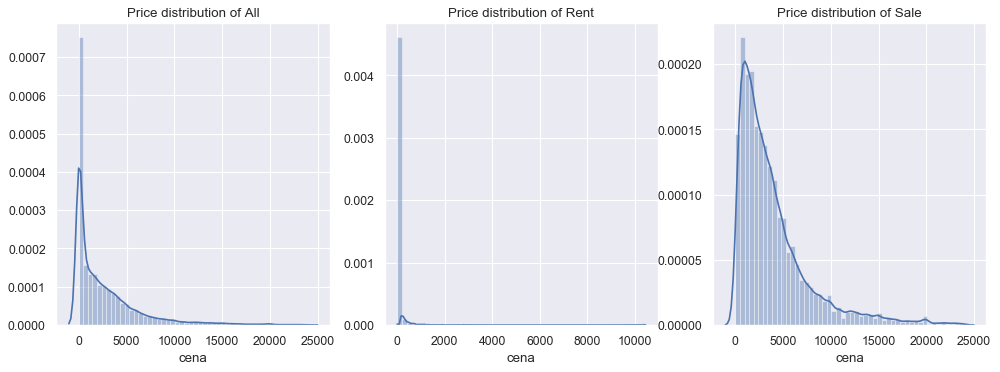

In [40]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
#distibution of prices (both rent and sell)
sns.distplot(noaukce_data_clean.cena)
q=plt.title('Price distribution of All')


plt.subplot(1, 3, 2)
#distribution of prices - rent
tmp_rent = noaukce_data_clean[noaukce_data_clean.typ_inzeratu == "pronajem"]
sns.distplot(tmp_rent.cena)
q=plt.title('Price distribution of Rent')

plt.subplot(1, 3, 3)
#distribution of prices - rent
tmp_sell = noaukce_data_clean[noaukce_data_clean.typ_inzeratu == "prodej"]
sns.distplot(tmp_sell.cena)
q=plt.title('Price distribution of Sale')

Distrubutions of price for Sale, Rent and all

In [41]:
tmp_rent.cena.describe()

count    16803.000000
mean        46.005096
std        167.308321
min          0.084000
25%          9.000000
50%         15.000000
75%         30.000000
max      10452.041000
Name: cena, dtype: float64

## Here we present the most important charts of the analysis:

#### boxplots


In [42]:
noaukce_data_clean_sale = noaukce_data_clean[noaukce_data_clean.typ_inzeratu == "prodej"]

In [43]:
# rent values might still be unrealistically high (either they are outliers or just high values)

In [44]:
noaukce_data_clean_rent = noaukce_data_clean[noaukce_data_clean.typ_inzeratu == "pronajem"]

In [45]:
#dropping outliers for rent -> to have cleaner statitstics (distribution of rents was very heavy tailed)
noaukce_data_clean_rent = noaukce_data_clean_rent[noaukce_data_clean_rent.cena < np.percentile(noaukce_data_clean_rent.cena, 99)]

In [46]:
#sorting ids for following boxplots
sortid_noaukce_data_clean_sale = noaukce_data_clean_sale.groupby("kategorie").median()["cena"].sort_values().index

sortid_noaukce_data_clean_rent = noaukce_data_clean_rent.groupby("kategorie").median()["cena"].sort_values().index

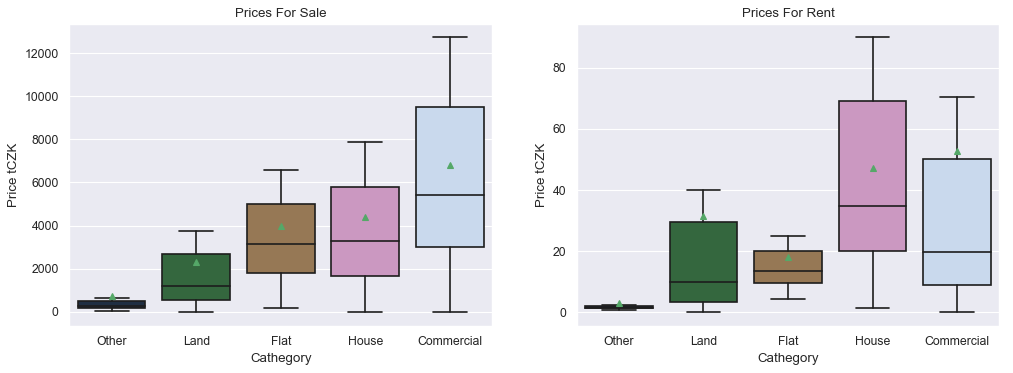

In [47]:
#boxpolot
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
ax = sns.boxplot(x="kategorie", y="cena", data=noaukce_data_clean_sale, showfliers=False, whis=0.5,
            showmeans=True,palette="cubehelix", order = sortid_noaukce_data_clean_sale)
q=plt.title('Prices For Sale')
q=ax.set(xticklabels=["Other", "Land", "Flat", "House","Commercial"])
q=ax.set(xlabel='Cathegory', ylabel='Price tCZK')



plt.subplot(1, 2, 2)
ax = sns.boxplot(x="kategorie", y="cena", data=noaukce_data_clean_rent, showfliers=False, whis=0.5,
            showmeans=True,palette="cubehelix", order = sortid_noaukce_data_clean_sale)
q=plt.title('Prices For Rent')
q=ax.set(xticklabels=["Other", "Land", "Flat", "House","Commercial"])
q=ax.set(xlabel='Cathegory', ylabel='Price tCZK')


From the For sale chart, we can see that land is on average the cheapest cathegory on Sreality. Moreover, flats are second, however very close to houses on its median prices! - This provide us with information that prices in the cities are increasing very rapidly and now are almost as expensive as houses (probably on the suburban and rural areas). Commercial RE prices fluctuates due to the variety of groups (office, agro, warehouse,etc.).

The rent prices are, on the other hand much more expensive for houses compared to flats. Land rentals vary greatly in terms of price and commercial cathegory is very similar in terms of sale and rental.

In [48]:
sort_id_byty_sale = noaukce_data_clean_sale[noaukce_data_clean_sale.kategorie=="byty"].groupby("podkategorie").median()["cena"].sort_values().index

In [49]:
sort_id_byty_rent = noaukce_data_clean_rent[noaukce_data_clean_rent.kategorie=="byty"].groupby("podkategorie").median()["cena"].sort_values().index

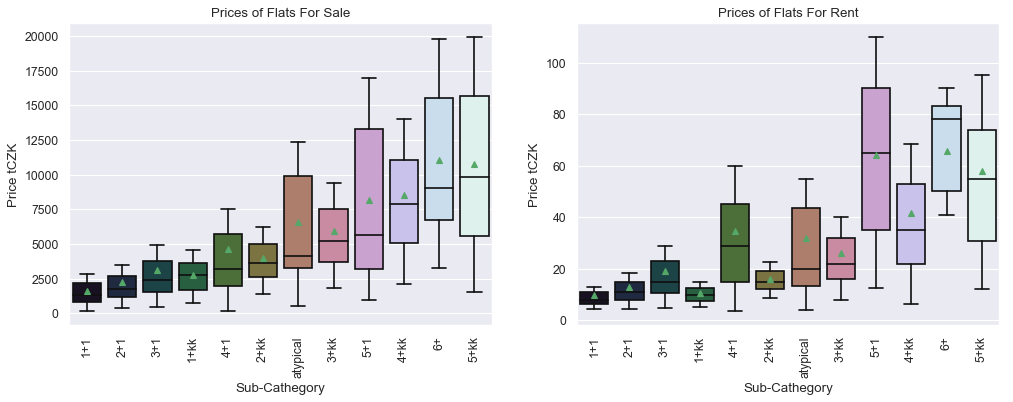

In [50]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
ax = sns.boxplot(x="podkategorie", y="cena", data=noaukce_data_clean_sale[noaukce_data_clean_sale.kategorie=="byty"], 
                 showfliers=False, whis=0.5,showmeans=True,palette="cubehelix",
                order = sort_id_byty_sale)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
q=plt.title('Prices of Flats For Sale')
q=ax.set(xticklabels=["1+1", "2+1", "3+1", "1+kk","4+1","2+kk","atypical","3+kk","5+1","4+kk","6+","5+kk"])
q=ax.set(xlabel='Sub-Cathegory', ylabel='Price tCZK')

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x="podkategorie", y="cena", data=noaukce_data_clean_rent[noaukce_data_clean_rent.kategorie=="byty"],
                  showfliers=False, whis=0.5,showmeans=True,palette="cubehelix",
                 order = sort_id_byty_sale)
e=ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
q=plt.title('Prices of Flats For Rent')
q=ax2.set(xticklabels=["1+1", "2+1", "3+1", "1+kk","4+1","2+kk","atypical","3+kk","5+1","4+kk","6+","5+kk"])
q=ax2.set(xlabel='Sub-Cathegory', ylabel='Price tCZK')


The prices follow .. On average the "KK" flats are more expensive than "+1" flats. This is an interesting finding. Moreover, in our Sample, the 1+kk tend to be relatively expensive - it could be due to the fact that these flats tend to be large, or due to a location -> we will examine these nuances in our project in the future.However, generally the rule: more rooms -> higher the price, holds.

Moreover, the rent prices holds with the prices for sale!.

### Now, let's see the real estate agencies and their offering:

In [51]:
# take top 20 real estate agencies

data_clean_sub = data_clean[data_clean.s_name.isin(dd.index)]

In [52]:
noaukce_data_clean_sale_top20 = noaukce_data_clean_sale[noaukce_data_clean_sale.s_name.isin(dd.index)] 

#get only byty
noaukce_data_clean_sale_top20 = noaukce_data_clean_sale_top20[noaukce_data_clean_sale_top20.kategorie=="byty"]

In [53]:
noaukce_data_clean_rent_top20 = noaukce_data_clean_rent[noaukce_data_clean_rent.s_name.isin(dd.index)]

#get only byty
noaukce_data_clean_rent_top20 = noaukce_data_clean_rent_top20[noaukce_data_clean_rent_top20.kategorie=="byty"]

In [54]:
#sort them by median
sort_id_realitka_sale = noaukce_data_clean_sale_top20.groupby("s_name").mean()["cena"].sort_values().index

sort_id_realitka_rent = noaukce_data_clean_rent_top20.groupby("s_name").mean()["cena"].sort_values().index

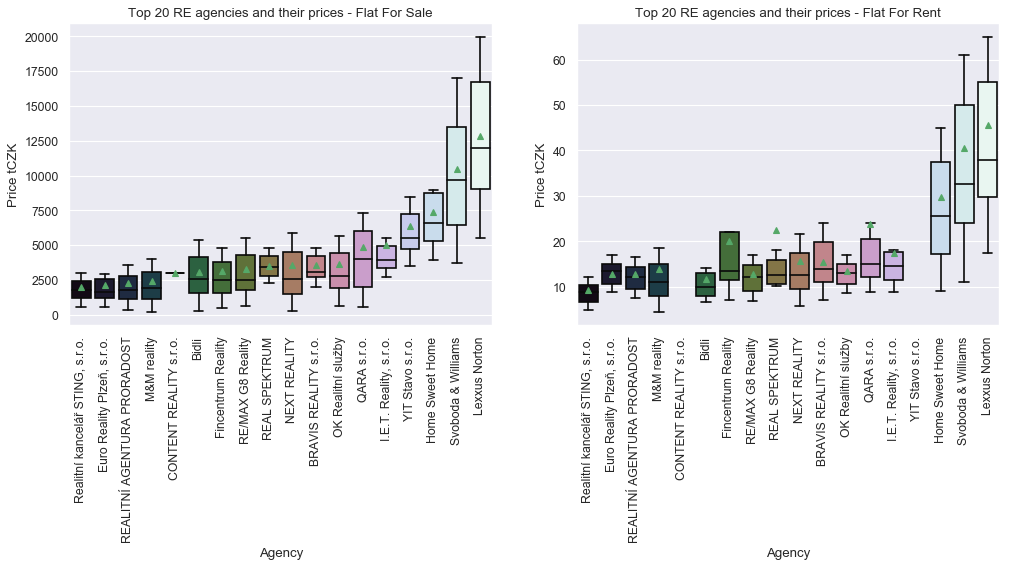

In [55]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
ax = sns.boxplot(x="s_name", y="cena", data=noaukce_data_clean_sale_top20, 
                 showfliers=False, whis=0.5,showmeans=True,palette="cubehelix",
                order = sort_id_realitka_sale)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
q=plt.title('Top 20 RE agencies and their prices - Flat For Sale')
q=ax.set(xlabel='Agency', ylabel='Price tCZK')

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x="s_name", y="cena", data=noaukce_data_clean_rent_top20,
                  showfliers=False, whis=0.5,showmeans=True,palette="cubehelix",
                 order = sort_id_realitka_sale)
e=ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
q=plt.title('Top 20 RE agencies and their prices - Flat For Rent')
q=ax2.set(xlabel='Agency', ylabel='Price tCZK')

On the charts presenting below, we are showing the low-cost and high-end agencies, so if someone wants to sell a small flat he should go to the Sting, M&M or ProRadost agencies. However, if the mansion wants to be sold - we would recommned to go to Svoboda & Williams, Lexxus Norton or Home Sweet Home agencies. 

### Major findings:

  - Cathegories House and Land are lacking supply almost surely due to low demand for rental purposes.
  - Sale/Rent Ratio for flats can be a good proxy for market mood 
  - The most liquid market for selling/renting is market for flats, especially for small to medium sized flats (1+1, 1+kk, 2+1, 2+kk, 3+1, 3+kk).
  - The 1+1 and 1+kk have the highest proportion of Rental listings -> probably a lot of people are investing into RE through affordable 1+1 and 1+kk and renting these flats.
  - In the For Sale cathegory, the Flats and Houses are on average very similarly priced, at least on Sreality. This Could have very interesting implications for a future research.

  - "KK" flats are on average more expensive than "+1" - for both Sale and Rent
  - We arrange the agencies according to their price points - so people can find appropriate agency according to agency added value (experience) in the fields of low - high price points.
  - On Sreality, there is relatively significant share of listings with price of 1czk - we believe that it is a negotiable price. This could be also interesting topic for a future research.
  - The M&M reality is the biggest reality lister on the Sreality with the ~11% market share.